In [2]:
import numpy
import pandas as pd
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt


In [3]:
def fetch_option_data(ticker): 
    """
    Fetch option chain data for a given stock ticker. """
    Ticker = yf.Ticker(ticker)
    expirations = Ticker.options
    option_data = pd.DataFrame() 
    for expiration in expirations:

        option_chain = Ticker.option_chain(expiration) 

        calls = option_chain.calls
        calls['Option Type'] = "Call" 

        puts = option_chain.puts
        puts['Option Type'] = "Put" 

        options = pd.concat([calls, puts])

        options['Expiration Date'] = pd.to_datetime(expiration) + pd.DateOffset(hours=23, minutes=59, seconds=5)
        
        option_data = pd.concat([option_data, options])
    option_data["Days to Expiration"] = (option_data['Expiration Date'] - dt.datetime.today()).dt.days + 1 
    return option_data

In [4]:
# Fetch option data for NASDAQ
options_data = fetch_option_data("^NDX")

In [5]:
 # Select call options
call_options = options_data[options_data["Option Type"] == "Call"]

In [6]:
 # Print available expiration dates
print("Available Expiration Dates:")
print(set(call_options['Expiration Date']))
 

Available Expiration Dates:
{Timestamp('2024-12-31 23:59:05'), Timestamp('2025-05-16 23:59:05'), Timestamp('2024-06-11 23:59:05'), Timestamp('2024-06-24 23:59:05'), Timestamp('2024-07-19 23:59:05'), Timestamp('2024-07-05 23:59:05'), Timestamp('2025-03-21 23:59:05'), Timestamp('2026-12-18 23:59:05'), Timestamp('2024-11-15 23:59:05'), Timestamp('2024-10-18 23:59:05'), Timestamp('2025-01-17 23:59:05'), Timestamp('2024-06-12 23:59:05'), Timestamp('2024-07-09 23:59:05'), Timestamp('2024-06-14 23:59:05'), Timestamp('2024-07-12 23:59:05'), Timestamp('2024-09-30 23:59:05'), Timestamp('2025-06-20 23:59:05'), Timestamp('2024-07-15 23:59:05'), Timestamp('2024-07-10 23:59:05'), Timestamp('2024-07-26 23:59:05'), Timestamp('2024-09-20 23:59:05'), Timestamp('2024-07-03 23:59:05'), Timestamp('2024-08-02 23:59:05'), Timestamp('2024-06-28 23:59:05'), Timestamp('2024-06-20 23:59:05'), Timestamp('2024-06-17 23:59:05'), Timestamp('2024-07-01 23:59:05'), Timestamp('2024-06-18 23:59:05'), Timestamp('2025-04-

In [10]:
 # Select an expiration date to plot
chosen_expiry_date = "2024-08-16 23:59:05"
selected_calls_at_expiry = call_options[call_options["Expiration Date"] == chosen_expiry_date]

In [11]:
# Filter out low implied volatility options
filtered_calls_at_expiry = selected_calls_at_expiry[selected_calls_at_expiry["impliedVolatility"] >= 0.005]
# Set the strike price as the index for better plotting
filtered_calls_at_expiry.set_index("strike", inplace=True)

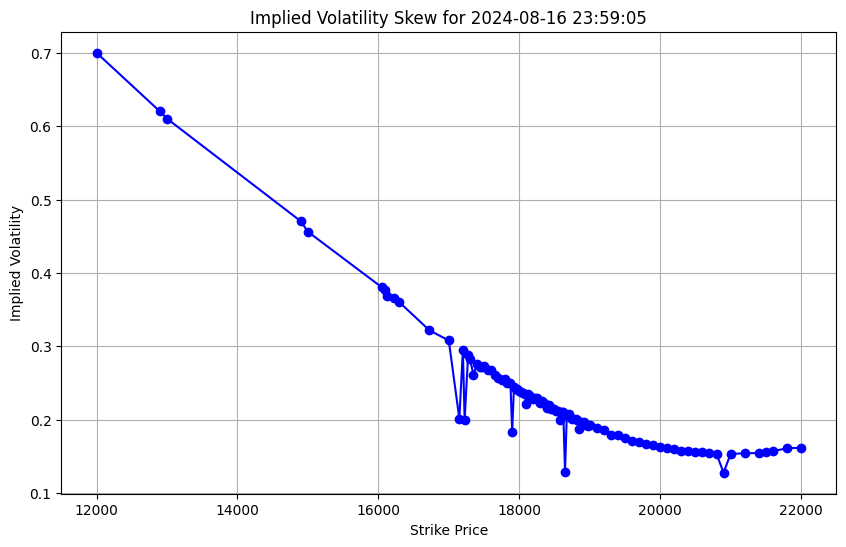

In [13]:
# Plot Implied Volatility Skew
plt.figure(figsize=(10, 6))
plt.plot(filtered_calls_at_expiry.index, filtered_calls_at_expiry["impliedVolatility"], marker='o', linestyle='-', color='b')
plt.title(f"Implied Volatility Skew for {chosen_expiry_date}")
plt.xlabel("Strike Price")
plt.ylabel("Implied Volatility")
plt.grid(True)

In [23]:
 # Select a specific strike price to plot
selected_strike_price = 20000
selected_calls_at_strike = call_options[call_options["strike"] == selected_strike_price]

In [24]:
# Filter out low implied volatility options
filtered_calls_at_strike = selected_calls_at_strike[selected_calls_at_strike["impliedVolatility"] >= 0.001]

In [25]:
 # Set the expiration date as the index for better plotting
filtered_calls_at_strike.set_index("Expiration Date", inplace=True)

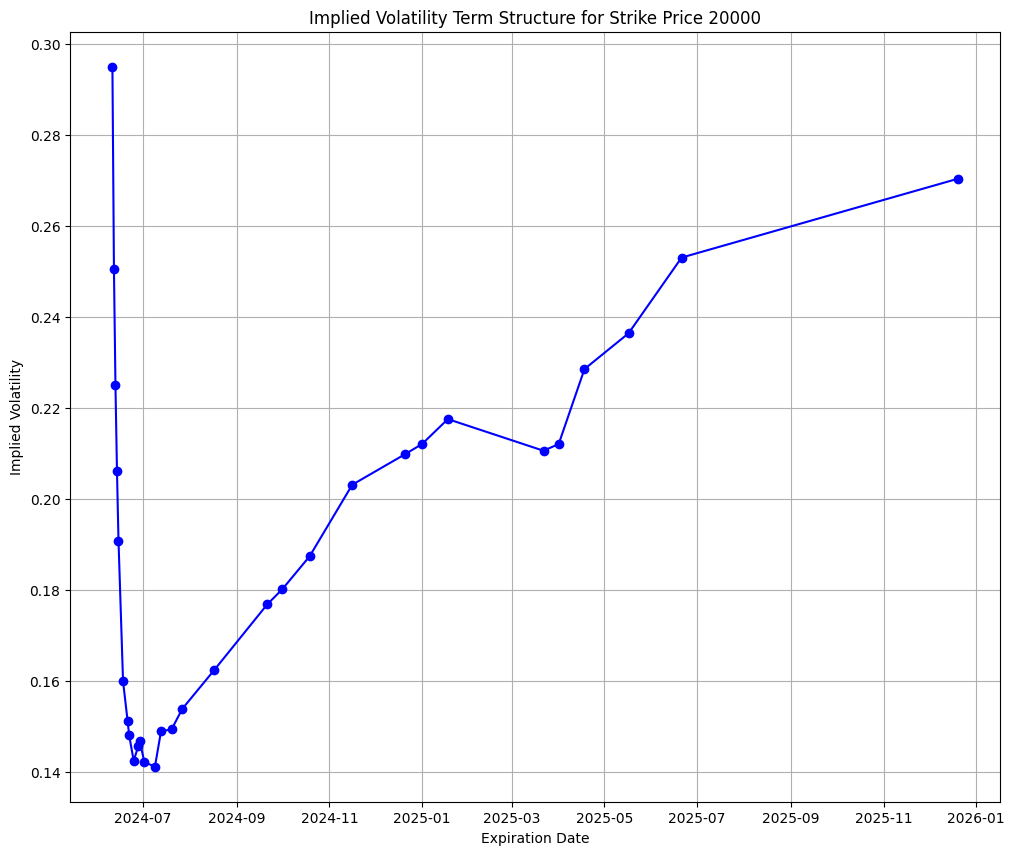

In [26]:
# Plot Implied Volatility Term Structure
plt.figure(figsize=(12, 10))
plt.plot(filtered_calls_at_strike.index, filtered_calls_at_strike["impliedVolatility"], marker='o', linestyle='-', color='b') 
plt.title(f"Implied Volatility Term Structure for Strike Price {selected_strike_price}")
plt.xlabel("Expiration Date")
plt.ylabel("Implied Volatility")
plt.grid(True)